### Problem 1. 
Represent the following expressions in TensorFlow 𝑦 = 2 𝑥2 + 5, 
𝑧 = (3 ∗ 𝑦 − 4)/𝑥
Calculate and print the value of 𝑦 where 𝑥 is a series of values starting with 1, incremented by 1 and ending at 9. Define variable x with a placeholder so that you could feed different values of 𝑥 while calculating 𝑦. Use Session.run() method which is fed different x values through a fetch_dict(ionary). Similarly, calculate and print values of 𝑧. Generate a TensorBoard graph of your calculations.
(15%)

In [1]:
import tensorflow as tf
from tensorflow.python.framework import ops
%load_ext tensorboard
ops.reset_default_graph()

#### Output Y and Z

In [2]:

x = tf.placeholder(tf.float32)
y = tf.add(tf.multiply(tf.square(x),2), 5)
z = tf.math.divide(tf.subtract(tf.multiply(y,3),4),x)
# Start up a `Session` using the default graph
# with y as output and x input
sess_y_x = tf.Session()
# Define a dictionary that will replace the value of `a` with 15
replace_dict_x = {x: list(range(1,10))}
print("Value of x:")
print(replace_dict_x)
print("")
# Run the session, passing in `replace_dict` as the value to `feed_dict` sess.run(b, feed_dict=replace_dict) #
print("Result of y: ")
sess_y_x.run(y, feed_dict=replace_dict_x)
print(sess_y_x.run(y, feed_dict=replace_dict_x)) 
replace_dict_y = {y: list(sess_y_x.run(y, feed_dict=replace_dict_x))}
print("")
# Start up a new session
# with z as output and x,y input
sess_z_xy = tf.Session()
print("Merged replace xy dictionary:")
replace_dict_xy = {**replace_dict_x, **replace_dict_y }
print(replace_dict_xy)
print("")
print("Result of z: ")
print(sess_z_xy.run(z, feed_dict=replace_dict_xy)) 

sess_y_x.close()
sess_z_xy.close()


Value of x:
{<tf.Tensor 'Placeholder:0' shape=<unknown> dtype=float32>: [1, 2, 3, 4, 5, 6, 7, 8, 9]}

Result of y: 
[  7.  13.  23.  37.  55.  77. 103. 133. 167.]

Merged replace xy dictionary:
{<tf.Tensor 'Placeholder:0' shape=<unknown> dtype=float32>: [1, 2, 3, 4, 5, 6, 7, 8, 9], <tf.Tensor 'Add:0' shape=<unknown> dtype=float32>: [7.0, 13.0, 23.0, 37.0, 55.0, 77.0, 103.0, 133.0, 167.0]}

Result of z: 
[17.       17.5      21.666666 26.75     32.2      37.833332 43.57143
 49.375    55.22222 ]


#### Generate a TensorBoard graph of your calculations.

In [3]:
g = tf.Graph()
with g.as_default():
    x = tf.placeholder(tf.float32, name = "X")
    with tf.name_scope("ZX"): 
        with tf.name_scope("YX"):
            y = tf.add(tf.multiply(tf.square(x),2), 5)
        with tf.name_scope("ZY"):
            z = tf.math.divide(tf.subtract(tf.multiply(y,3),4),x)
tf.summary.FileWriter("output/", g).close()

In [4]:
#tensorboard --logdir='output/'

<img src='output/1.png' height = 800 width = 800>

### Problem 2. 
Consider 100 points along the straight line in (𝑥, 𝑦) plane represented by the linear equation 𝑦 = 0.3𝑥 + 0.2. Distribute those points along the line uniformly in the interval between -2.0 and 3.0. To the y coordinate of each point add a random normally distributed value with standard deviation of 1 and mean 0. You have created anartificial set of random measurements. Create a shallow neural network with one layer which will be able to predict y value corresponding to any x value in the above interval. Implement and train the network using TensorFlow API. Report on the accuracy of your model. This is a rather trivial problem and you do not need neural networks to solve it. We are practicing TensorFlow API. This was problem #2 of your Problem set #1. Then we did it with Keras. Now, you are asked to implement this problem in TensorFlow.

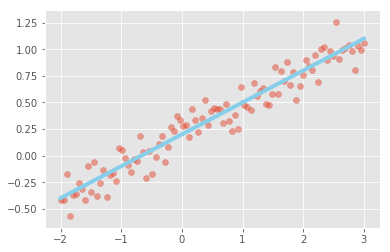

In [5]:
import numpy as np
import random
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

random.seed(100)
# Generate data points, use 1000 data points instead of 100 for higher accuracy
num_points=100
x = np.linspace(-2,3,num_points)
# Add noise, scale is changed to 0.1 to lower noise
noise = np.random.normal(loc=0.0, scale=0.1, size=num_points)
y = 0.3*x + 0.2 + noise
# Take a look
plt.scatter(x,y,alpha =.5)
plt.plot(x,0.3*x + 0.2, color = "skyblue", linewidth = 4)

#### Train-Validation Split

In [6]:
from sklearn.model_selection import train_test_split
train_x1, val_x1, train_y1, val_y1 = train_test_split(x,y, test_size=0.2, random_state=42,shuffle=True)

print(x.shape)
print(train_x1.shape)
print(y.shape)
print(train_y1.shape)

(100,)
(80,)
(100,)
(80,)


#### Build Model and Training Result

In [7]:
# Reference: https://www.geeksforgeeks.org/linear-regression-using-tensorflow/
X = tf.placeholder("float") 
Y = tf.placeholder("float") 
W = tf.Variable(np.random.randn(), name = "W") 
b = tf.Variable(np.random.randn(), name = "b") 
learning_rate = 0.01
training_epochs = 1000
# Hypothesis 
y_pred = tf.add(tf.multiply(X, W), b) 

# Mean Squared Error Cost Function 
n = len(train_x1) # Number of data points 
cost = tf.reduce_sum(tf.pow(y_pred-Y, 2)) / (2 * n) 

# Gradient Descent Optimizer 
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) 

# Global Variables Initializer 
init = tf.global_variables_initializer() 

# Starting the Tensorflow Session 
with tf.Session() as sess: 
	
	# Initializing the Variables 
	sess.run(init) 
	
	# Iterating through all the epochs 
	for epoch in range(training_epochs): 
		
		# Feeding each data point into the optimizer using Feed Dictionary 
		for (_x, _y) in zip(train_x1, train_y1): 
			sess.run(optimizer, feed_dict = {X : _x, Y : _y}) 
		
		# Displaying the result after every 50 epochs 
		if (epoch + 1) % 50 == 0: 
			# Calculating the cost a every epoch 
			c = sess.run(cost, feed_dict = {X : train_x1, Y : train_y1}) 
			print("Epoch", (epoch + 1), ": cost =", c, "W =", sess.run(W), "b =", sess.run(b)) 
	# Storing necessary values to be used outside the Session 
	training_cost = sess.run(cost, feed_dict ={X: train_x1, Y: train_y1}) 
	val_cost = sess.run(cost, feed_dict ={X: val_x1, Y: val_y1}) 
	weight = sess.run(W) 
	bias = sess.run(b) 
	print("\nTraining cost =", training_cost,"Validation cost =", val_cost, '\n')
	print("Weight =", weight, "bias =", bias, '\n') 

W0723 18:40:41.593816 4521780672 deprecation.py:323] From /anaconda3/envs/pytf/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1205: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 50 : cost = 0.20375386 W = -0.10331922 b = 0.68849695
Epoch 100 : cost = 0.072296515 W = 0.106514886 b = 0.5550704
Epoch 150 : cost = 0.034165476 W = 0.18799892 b = 0.44573137
Epoch 200 : cost = 0.018614022 W = 0.22674055 b = 0.3672743
Epoch 250 : cost = 0.011776105 W = 0.24842702 b = 0.3134052
Epoch 300 : cost = 0.008730635 W = 0.26179415 b = 0.27702516
Epoch 350 : cost = 0.0073712985 W = 0.27042544 b = 0.2526131
Epoch 400 : cost = 0.0067643076 W = 0.27611327 b = 0.23627356
Epoch 450 : cost = 0.00649324 W = 0.2798916 b = 0.22534847
Epoch 500 : cost = 0.0063721645 W = 0.28241113 b = 0.21804674
Epoch 550 : cost = 0.00631807 W = 0.28409305 b = 0.21316701
Epoch 600 : cost = 0.006293899 W = 0.28521574 b = 0.20990644
Epoch 650 : cost = 0.006283091 W = 0.285966 b = 0.20772788
Epoch 700 : cost = 0.0062782555 W = 0.2864666 b = 0.20627226
Epoch 750 : cost = 0.006276089 W = 0.2868014 b = 0.20529889
Epoch 800 : cost = 0.006275117 W = 0.2870268 b = 0.20464945
Epoch 850 : cost = 0.00627468 W 

#### Visualization of Fitted Line

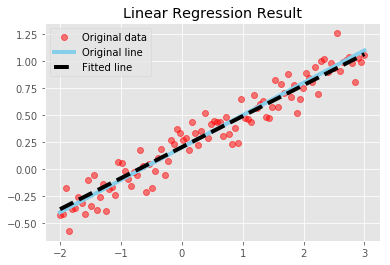

In [8]:
predictions = weight * x + bias 
# Plotting the Results 
plt.plot(x, y, 'ro', label ='Original data', alpha = .5) 
plt.plot(x,0.3*x + 0.2, color = "skyblue" , linewidth = 4, label = 'Original line')
plt.plot(x, predictions, color = "black",linewidth = 4,linestyle = 'dashed',label ='Fitted line') 
plt.title('Linear Regression Result') 
plt.legend() 
plt.show() 

### Problem 3. 
Using code in the attached file named graph_and_summaries.py, demonstrate complex TensorBoard Graphs and Summaries. Capture a few of resulting graphs and summaries. Demonstrate that nested graphs could be expanded and collapsed. Please fix the code if it needs fixing. Provide us with working code. Code is a bit old and you might have to replace older TF calls with the current versions. This code paints several TensorBoard graphs displayed in the notes for Lecture 7.
(10%)

In [9]:
# Fix original code
# Explicitly create a Graph object
graph = tf.Graph()

with graph.as_default():
    
    with tf.name_scope("variables"):
        # Variable to keep track of how many times the graph has been run
        global_step = tf.Variable(0, dtype=tf.int32, name="global_step")
        
        # Increments the above `global_step` Variable, should be run whenever the graph is run
        increment_step = global_step.assign_add(1)
        
        # Variable that keeps track of previous output value:
        previous_value = tf.Variable(0.0, dtype=tf.float32, name="previous_value")
    
    # Primary transformation Operations
    with tf.name_scope("exercise_transformation"):
        
        # Separate input layer
        with tf.name_scope("input"):
            # Create input placeholder- takes in a Vector 
            a = tf.placeholder(tf.float32, shape=[None], name="input_placeholder_a")
    
        # Separate middle layer
        with tf.name_scope("intermediate_layer"):
            b = tf.reduce_prod(a, name="product_b")
            c = tf.reduce_sum(a, name="sum_c")
        
        # Separate output layer
        with tf.name_scope("output"):
            d = tf.add(b, c, name="add_d")
            output = tf.subtract(d, previous_value, name="output")
            update_prev = previous_value.assign(output)
    
    # Summary Operations
    with tf.name_scope("summaries"):
        tf.summary.scalar('output', output)  # Creates summary for output node
        tf.summary.scalar('product of inputs', b)
        tf.summary.scalar('sum of inputs', c)
    
    # Global Variables and Operations
    with tf.name_scope("global_ops"):
        # Initialization Op
        init = tf.global_variables_initializer()
        # Collect all summary Ops in graph
        merged_summaries = tf.summary.merge_all()

# Start a Session, using the explicitly created Graph
sess = tf.Session(graph=graph)

# Open a SummaryWriter to save summaries
writer = tf.summary.FileWriter('./improved_graph', graph)

# Initialize Variables
sess.run(init)

def run_graph(input_tensor):
    """
    Helper function; runs the graph with given input tensor and saves summaries
    """
    feed_dict = {a: input_tensor}
    output, summary, step = sess.run([update_prev, merged_summaries, increment_step], feed_dict=feed_dict)
    writer.add_summary(summary, global_step=step)


# Run the graph with various inputs
run_graph([2,8])
run_graph([3,1,3,3])
run_graph([8])
# run_graph([1,2,3])
# run_graph([11,4])
# run_graph([4,1])
# run_graph([7,3,1])
# run_graph([6,3])
# run_graph([0,2])
# run_graph([4,5,6])

# Writes the summaries to disk
writer.flush()

# Flushes the summaries to disk and closes the SummaryWriter
writer.close()

# Close the session
sess.close()

# To start TensorBoard after running this file, execute the following command:
# $ tensorboard --logdir='./improved_graph'

#### Show Summaries

<img src='improved_graph/summary.jpg' height = 800 width = 800>

#### Show Unexpanded Main Graph

<img src='improved_graph/png.png' height = 400 width = 400>

#### Show Partially Expanded Graph

<img src='improved_graph/png2.png' height = 400 width = 400>

<img src='improved_graph/png3.png' height = 400 width = 400>

<img src='improved_graph/png4.png' height = 400 width = 400>

#### Show Fully Exapnded Graph

<img src='improved_graph/png5.png' height = 800 width = 800>